In [102]:
import pandas as pd

In [103]:
df = pd.read_csv('Well_miningDS.csv')

In [104]:
df.columns

Index(['Unnamed: 0', 'Index', 'Well', 'Leg', 'Formation', 'Biozone',
       'Measured Depth (ft)', 'Footage Drilled / hr ', 'WHP (psig)',
       'SiBHP (psig)', 'BHP (psig)', 'Difference',
       'Reservoir Gas Rate (MMSCF/D)', 'BHT (DegF)',
       'Comments, post SNOC input'],
      dtype='object')

In [105]:
df

,Unnamed: 0,Index,Well,Leg,Formation,Biozone,Measured Depth (ft),Footage Drilled / hr,WHP (psig),SiBHP (psig),BHP (psig),Difference,Reservoir Gas Rate (MMSCF/D),BHT (DegF),"Comments, post SNOC input"
0,0,0,SAJAA-01,LEG C,SHUAIBA,19_S10,10680.0,48.0,234.6,1118,1155,NaN,0.736,NaN,NaN
1,1,1,SAJAA-01,LEG C,KHARAIB,2_K90,10728.0,62.9,98.0,1118,1108,NaN,0.133,NaN,NaN
2,2,2,SAJAA-01,LEG C,KHARAIB,20_K80 UPPER,10791.0,30.5,115.9,1118,1091,NaN,0.008,NaN,NaN
3,3,3,SAJAA-01,LEG C,KHARAIB,21_K80 MID/LOWER,10821.0,14.1,112.3,1118,1075,NaN,0.000,NaN,NaN
4,4,4,SAJAA-01,LEG C,KHARAIB,21_K80 MID/LOWER,10836.0,45.4,106.1,1118,1055,NaN,0.063,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1497,1775,SAJAA-06,LEG D,HABSHAN,43_H90,14254.0,46.0,70.1,860,1271,NaN,2.731,NaN,NaN
1498,1498,1776,SAJAA-06,LEG D,HABSHAN,43_H90,14300.0,38.0,83.2,860,1275,NaN,2.713,NaN,NaN
1499,1499,1777,SAJAA-06,LEG D,HABSHAN,43_H90,14338.0,62.0,66.4,860,1281,NaN,2.667,NaN,NaN
1500,1500,1778,SAJAA-06,LEG D,HABSHAN,43_H90,14400.0,40.0,67.5,860,1285,NaN,2.845,NaN,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1502 non-null   int64  
 1   Index                         1502 non-null   int64  
 2   Well                          1502 non-null   object 
 3   Leg                           1502 non-null   object 
 4   Formation                     1502 non-null   object 
 5   Biozone                       1500 non-null   object 
 6   Measured Depth (ft)           1501 non-null   float64
 7   Footage Drilled / hr          1501 non-null   float64
 8   WHP (psig)                    1502 non-null   float64
 9   SiBHP (psig)                  1502 non-null   int64  
 10  BHP (psig)                    1502 non-null   int64  
 11  Difference                    271 non-null    float64
 12  Reservoir Gas Rate (MMSCF/D)  1502 non-null   float64
 13  BHT

In [107]:
df.isna().sum()

Unnamed: 0                         0
Index                              0
Well                               0
Leg                                0
Formation                          0
Biozone                            2
Measured Depth (ft)                1
Footage Drilled / hr               1
WHP (psig)                         0
SiBHP (psig)                       0
BHP (psig)                         0
Difference                      1231
Reservoir Gas Rate (MMSCF/D)       0
BHT (DegF)                      1501
Comments, post SNOC input       1142
dtype: int64

In [108]:
df['Difference'] = df['SiBHP (psig)'] - df['BHP (psig)']

In [109]:
col_names = ['Measured Depth (ft)', 'Footage Drilled / hr ']

for column in col_names:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [110]:
df['Biozone'].fillna(method='bfill', inplace=True)


C:\Users\Pratham\AppData\Local\Temp\ipykernel_28504\627593489.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Biozone'].fillna(method='bfill', inplace=True)


In [111]:
df.columns

Index(['Unnamed: 0', 'Index', 'Well', 'Leg', 'Formation', 'Biozone',
       'Measured Depth (ft)', 'Footage Drilled / hr ', 'WHP (psig)',
       'SiBHP (psig)', 'BHP (psig)', 'Difference',
       'Reservoir Gas Rate (MMSCF/D)', 'BHT (DegF)',
       'Comments, post SNOC input'],
      dtype='object')

In [112]:
df2 = df.drop(columns=['Unnamed: 0'])


In [113]:
df2 = df2.iloc[:, :12]

In [114]:
df2

,Index,Well,Leg,Formation,Biozone,Measured Depth (ft),Footage Drilled / hr,WHP (psig),SiBHP (psig),BHP (psig),Difference,Reservoir Gas Rate (MMSCF/D)
0,0,SAJAA-01,LEG C,SHUAIBA,19_S10,10680.0,48.0,234.6,1118,1155,-37,0.736
1,1,SAJAA-01,LEG C,KHARAIB,2_K90,10728.0,62.9,98.0,1118,1108,10,0.133
2,2,SAJAA-01,LEG C,KHARAIB,20_K80 UPPER,10791.0,30.5,115.9,1118,1091,27,0.008
3,3,SAJAA-01,LEG C,KHARAIB,21_K80 MID/LOWER,10821.0,14.1,112.3,1118,1075,43,0.000
4,4,SAJAA-01,LEG C,KHARAIB,21_K80 MID/LOWER,10836.0,45.4,106.1,1118,1055,63,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1775,SAJAA-06,LEG D,HABSHAN,43_H90,14254.0,46.0,70.1,860,1271,-411,2.731
1498,1776,SAJAA-06,LEG D,HABSHAN,43_H90,14300.0,38.0,83.2,860,1275,-415,2.713
1499,1777,SAJAA-06,LEG D,HABSHAN,43_H90,14338.0,62.0,66.4,860,1281,-421,2.667
1500,1778,SAJAA-06,LEG D,HABSHAN,43_H90,14400.0,40.0,67.5,860,1285,-425,2.845


In [115]:
leg_count = df2.groupby('Well')['Leg'].size().reset_index(name='Leg Counts')


In [116]:
leg_count

,Well,Leg Counts
0,SAJAA-01,331
1,SAJAA-03,291
2,SAJAA-04,340
3,SAJAA-05,271
4,SAJAA-06,269


In [117]:

uniq_leg_count = df2.groupby('Well')['Leg'].nunique().reset_index(name='Unique Legs')


In [118]:
uniq_leg_count

,Well,Unique Legs
0,SAJAA-01,6
1,SAJAA-03,6
2,SAJAA-04,9
3,SAJAA-05,4
4,SAJAA-06,4


#### Plot for number of 'Leg' entries in each 'Well'


Text(0, 0.5, 'Number of Leg Entries')

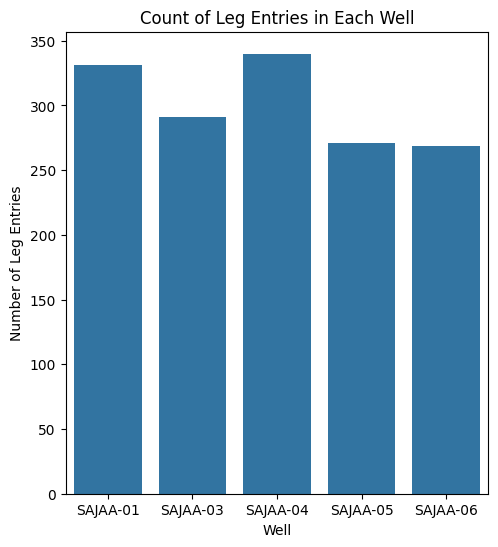

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Well', y='Leg Counts', data=leg_count)
plt.title('Count of Leg Entries in Each Well')
plt.xlabel('Well')
plt.ylabel('Number of Leg Entries')

#### Plot for number of unique 'Leg' entries in each 'Well'


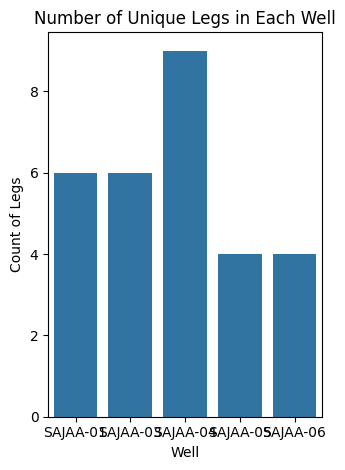

In [120]:
plt.subplot(1, 2, 2)
sns.barplot(x='Well', y='Unique Legs', data=uniq_leg_count)
plt.title('Number of Unique Legs in Each Well')
plt.xlabel('Well')
plt.ylabel('Count of Legs')

plt.tight_layout()
plt.show()

In [121]:
df2

,Index,Well,Leg,Formation,Biozone,Measured Depth (ft),Footage Drilled / hr,WHP (psig),SiBHP (psig),BHP (psig),Difference,Reservoir Gas Rate (MMSCF/D)
0,0,SAJAA-01,LEG C,SHUAIBA,19_S10,10680.0,48.0,234.6,1118,1155,-37,0.736
1,1,SAJAA-01,LEG C,KHARAIB,2_K90,10728.0,62.9,98.0,1118,1108,10,0.133
2,2,SAJAA-01,LEG C,KHARAIB,20_K80 UPPER,10791.0,30.5,115.9,1118,1091,27,0.008
3,3,SAJAA-01,LEG C,KHARAIB,21_K80 MID/LOWER,10821.0,14.1,112.3,1118,1075,43,0.000
4,4,SAJAA-01,LEG C,KHARAIB,21_K80 MID/LOWER,10836.0,45.4,106.1,1118,1055,63,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1775,SAJAA-06,LEG D,HABSHAN,43_H90,14254.0,46.0,70.1,860,1271,-411,2.731
1498,1776,SAJAA-06,LEG D,HABSHAN,43_H90,14300.0,38.0,83.2,860,1275,-415,2.713
1499,1777,SAJAA-06,LEG D,HABSHAN,43_H90,14338.0,62.0,66.4,860,1281,-421,2.667
1500,1778,SAJAA-06,LEG D,HABSHAN,43_H90,14400.0,40.0,67.5,860,1285,-425,2.845


#### Productivity index calculation using formula 
 PI = reservoir gas rate /(SiBHP-BHP)

In [122]:
df2.columns

Index(['Index', 'Well', 'Leg', 'Formation', 'Biozone', 'Measured Depth (ft)',
       'Footage Drilled / hr ', 'WHP (psig)', 'SiBHP (psig)', 'BHP (psig)',
       'Difference', 'Reservoir Gas Rate (MMSCF/D)'],
      dtype='object')

In [123]:
df2['PI (Productivity Index)'] = df['Reservoir Gas Rate (MMSCF/D)'] / (df['SiBHP (psig)'] - df['BHP (psig)'])

In [125]:
df2['PI (Productivity Index)']

0      -0.019892
1       0.013300
2       0.000296
3       0.000000
4       0.001000
          ...   
1497   -0.006645
1498   -0.006537
1499   -0.006335
1500   -0.006694
1501   -0.006567
Name: PI (Productivity Index), Length: 1502, dtype: float64

In [126]:
df2 

,Index,Well,Leg,Formation,Biozone,Measured Depth (ft),Footage Drilled / hr,WHP (psig),SiBHP (psig),BHP (psig),Difference,Reservoir Gas Rate (MMSCF/D),PI (Productivity Index)
0,0,SAJAA-01,LEG C,SHUAIBA,19_S10,10680.0,48.0,234.6,1118,1155,-37,0.736,-0.019892
1,1,SAJAA-01,LEG C,KHARAIB,2_K90,10728.0,62.9,98.0,1118,1108,10,0.133,0.013300
2,2,SAJAA-01,LEG C,KHARAIB,20_K80 UPPER,10791.0,30.5,115.9,1118,1091,27,0.008,0.000296
3,3,SAJAA-01,LEG C,KHARAIB,21_K80 MID/LOWER,10821.0,14.1,112.3,1118,1075,43,0.000,0.000000
4,4,SAJAA-01,LEG C,KHARAIB,21_K80 MID/LOWER,10836.0,45.4,106.1,1118,1055,63,0.063,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1775,SAJAA-06,LEG D,HABSHAN,43_H90,14254.0,46.0,70.1,860,1271,-411,2.731,-0.006645
1498,1776,SAJAA-06,LEG D,HABSHAN,43_H90,14300.0,38.0,83.2,860,1275,-415,2.713,-0.006537
1499,1777,SAJAA-06,LEG D,HABSHAN,43_H90,14338.0,62.0,66.4,860,1281,-421,2.667,-0.006335
1500,1778,SAJAA-06,LEG D,HABSHAN,43_H90,14400.0,40.0,67.5,860,1285,-425,2.845,-0.006694
